### SpaceX Falcon 9 Birinci Aşama İniş Tahmini


Çoğu başarısız iniş aslında planlıdır. SpaceX, kontrollü bir şekilde okyanusa iniş gerçekleştirir.

---

### Amaçlar

* Pandas ve Matplotlib kullanarak **Keşifsel Veri Analizi (EDA)** ve **Özellik Mühendisliği (Feature Engineering)** yapın.

---

### Keşifsel Veri Analizi (Exploratory Data Analysis)

* **Veri Hazırlama**
* **Özellik Mühendisliği**

---

### Kütüphaneleri İçe Aktarma ve Yardımcı Fonksiyonları Tanımlama

Bu çalışmada aşağıdaki Python kütüphanelerini içe aktaracağız.


In [1]:
# pandas, Python programlama dili için yazılmış, veri işleme ve analiz yapmaya yarayan bir yazılım kütüphanesidir.
import pandas as pd

# NumPy, Python dili için çok boyutlu diziler ve matrislerle çalışmayı sağlayan bir kütüphanedir. Aynı zamanda bu diziler üzerinde işlem yapmaya yarayan pek çok matematiksel fonksiyon içerir.
import numpy as np

# Matplotlib, Python için bir grafik çizim (plotlama) kütüphanesidir. Pyplot modülü bize MATLAB benzeri bir çizim arayüzü sunar. Verileri görselleştirmek için kullanacağız.
import matplotlib.pyplot as plt

# Seaborn, matplotlib tabanlı bir Python veri görselleştirme kütüphanesidir. Daha şık ve bilgilendirici istatistiksel grafikler çizmek için yüksek seviyeli bir arayüz sunar.
import seaborn as sns


### Keşifsel Veri Analizi (Exploratory Data Analysis)

İlk olarak, SpaceX veri setini bir **Pandas DataFrame** olarak içe aktaralım ve ardından veri setinin **özetini (summary)** yazdıralım.


In [3]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df=pd.read_csv(url)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0



İlk olarak, **FlightNumber** (yani ardışık fırlatma denemelerini gösteren sayı) ve **Payload** (yük kütlesi) değişkenlerinin **fırlatma sonucunu** nasıl etkilediğine bakalım.

**FlightNumber** ile **PayloadMass**'i görselleştirerek, üzerine fırlatma sonucunu da ekleyebiliriz.
Görüyoruz ki, **uçuş numarası arttıkça**, birinci aşamanın başarılı şekilde iniş yapma olasılığı da artıyor.
Ayrıca, **yük kütlesi de bir etken gibi görünüyor**; çünkü daha ağır yükler taşınsa bile, birinci aşamanın çoğunlukla başarılı şekilde geri döndüğü gözlemleniyor.


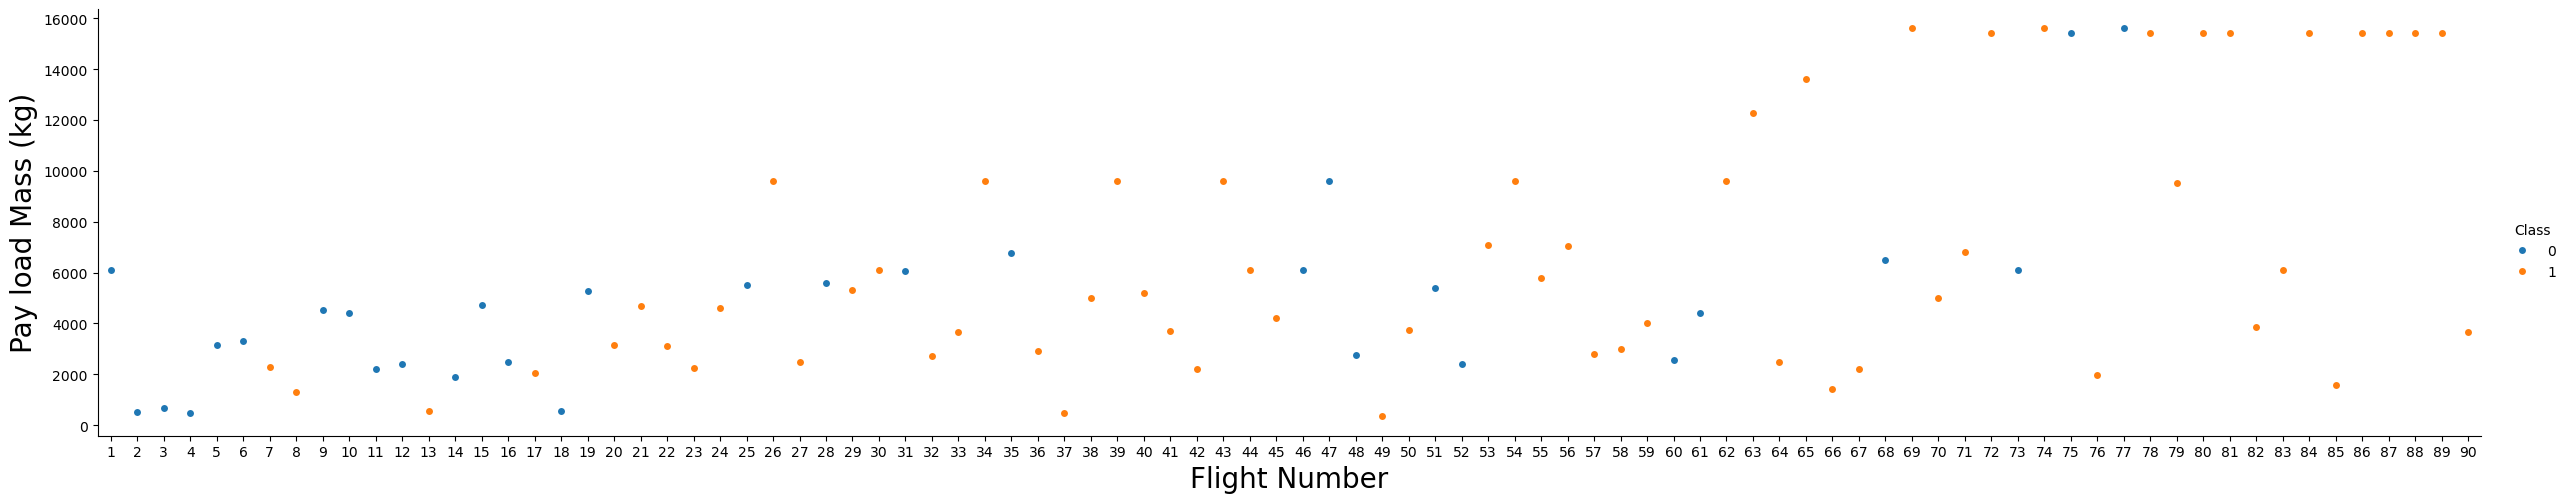

In [4]:
# Seaborn kütüphanesini kullanarak, FlightNumber (uçuş numarası) ile PayloadMass (yük kütlesi) arasındaki ilişkiyi görselleştiriyoruz.
# hue="Class" ile her görevin başarılı mı (1) yoksa başarısız mı (0) olduğunu renklendiriyoruz.
#aspect=5 → Grafiğin en-boy oranını uzatır, daha geniş görünmesini sağlar.

sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=5)

# X ekseni etiketini büyüterek belirtiyoruz
plt.xlabel("Flight Number", fontsize=20)

# Y ekseni etiketini büyüterek belirtiyoruz
plt.ylabel("Pay load Mass (kg)", fontsize=20)

# Grafiği göster
plt.show()


### Sonraki adım:

Şimdi her fırlatma noktasına (launch site) daha yakından bakalım ve ayrıntılı fırlatma kayıtlarını görselleştirelim.

---

### GÖREV 1:

**Flight Number (Uçuş Numarası)** ile **Launch Site (Fırlatma Noktası)** arasındaki ilişkiyi görselleştir

* `catplot` fonksiyonunu kullan
* `x` parametresine `FlightNumber` ver
* `y` parametresine `LaunchSite` ver
* `hue` parametresine `'class'` ver

Bu grafik, her fırlatma noktasında hangi uçuşların başarılı (1) ya da başarısız (0) olduğunu görmene yardımcı olur.


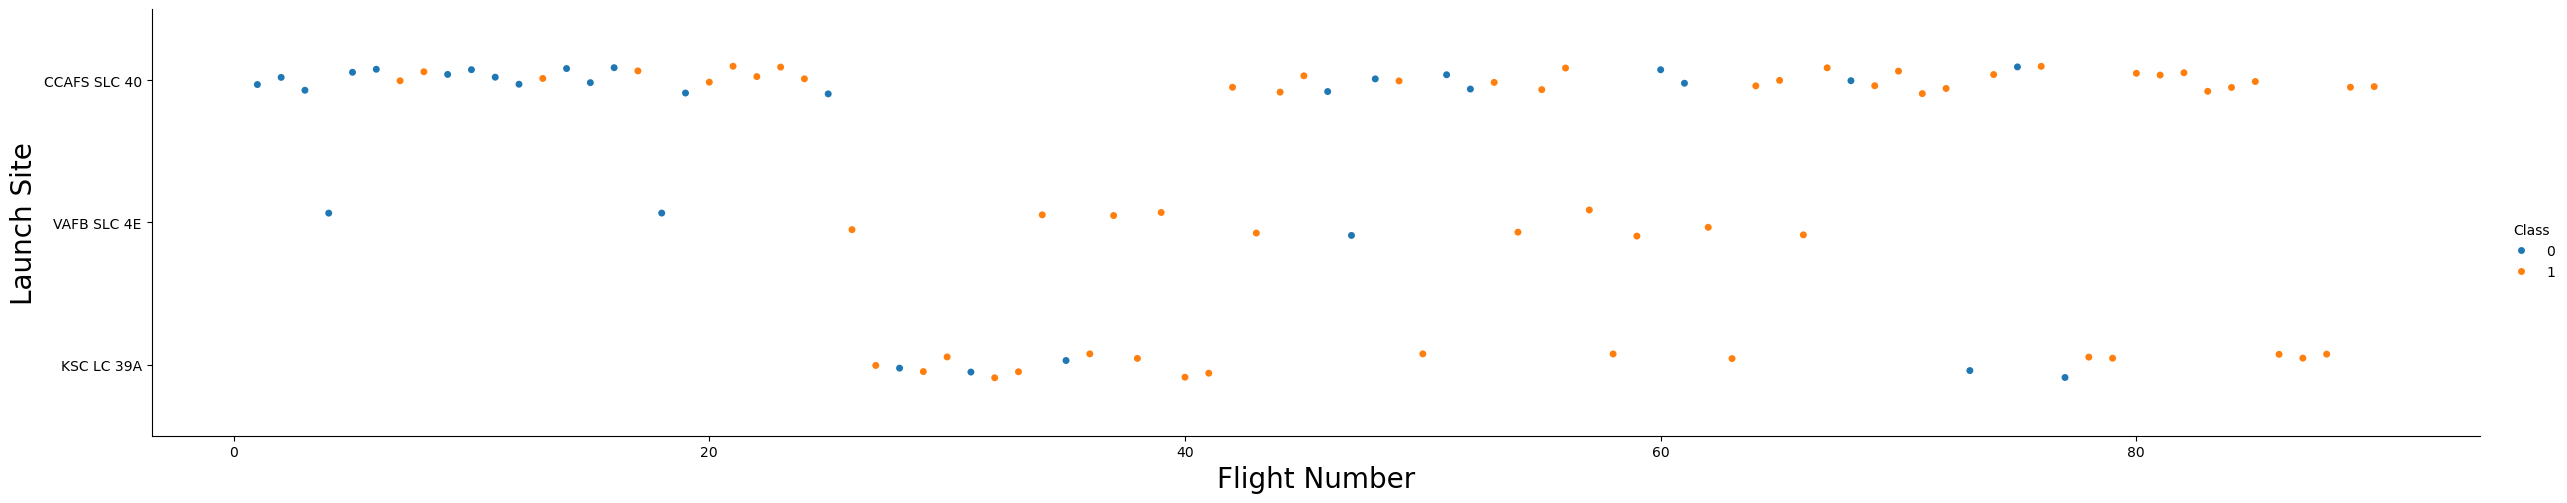

In [5]:
# Seaborn kütüphanesi ile her fırlatma noktasındaki (Launch Site)
# uçuş numaralarının (Flight Number) göre fırlatma başarısını (Class) gösteren grafik çiziyoruz.

# x ekseni: FlightNumber (uçuş numarası)
# y ekseni: LaunchSite (fırlatma yeri)
# hue: Class (1 = başarılı, 0 = başarısız)

sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=5)

# X ekseni etiketi
plt.xlabel("Flight Number", fontsize=20)

# Y ekseni etiketi
plt.ylabel("Launch Site", fontsize=20)

# Grafiği göster
plt.show()


Şimdi, Flight Number (Uçuş Numarası) ile Launch Site (Fırlatma Noktası) arasındaki dağılım grafiğinde bulduğun desenleri (örüntüleri) açıklamaya çalış.

---

### GÖREV 2:

**Payload Mass (Yük Kütlesi)** ile **Launch Site (Fırlatma Noktası)** arasındaki ilişkiyi görselleştir.

Ayrıca, fırlatma noktaları ile yük kütleleri arasında herhangi bir ilişki olup olmadığını gözlemlemek istiyoruz.


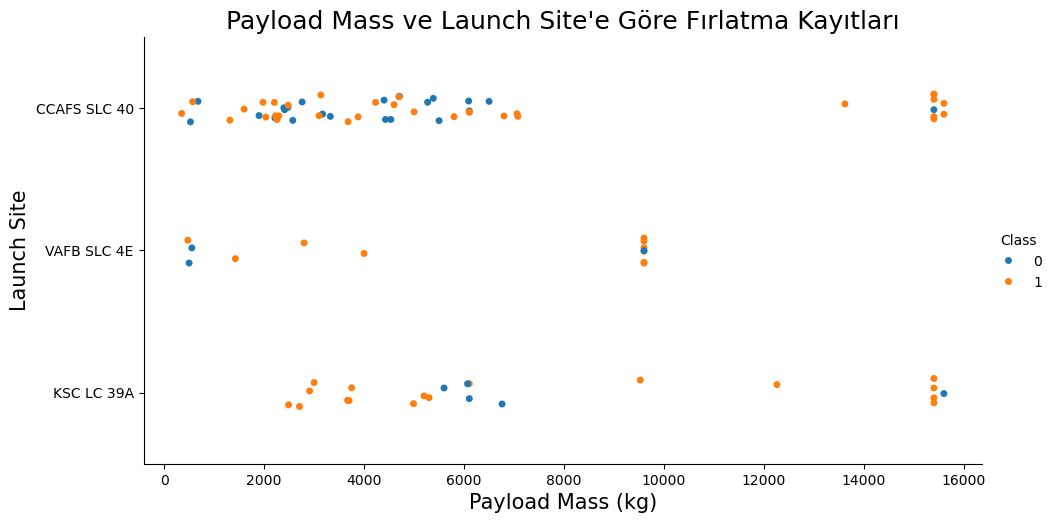

In [11]:
# PayloadMass ile LaunchSite arasındaki ilişkiyi görselleştir
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect=2)

plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Payload Mass ve Launch Site'e Göre Fırlatma Kayıtları", fontsize=18)

plt.show()

Şimdi, **Payload Mass (Yük Kütlesi) ile Launch Site (Fırlatma Noktası)** arasındaki dağılım grafiğine bakarsan,
**VAFB-SLC** fırlatma noktasında 10.000 kg’dan daha ağır yükler için hiç roket fırlatılmadığını göreceksin.


### GÖREV 3:

Her bir yörünge tipi için başarı oranı arasındaki ilişkiyi görselleştir.

---

Sonraki adımda, başarı oranı ile yörünge tipi arasında herhangi bir ilişki olup olmadığını görsel olarak incelemek istiyoruz.

---

Her yörünge tipinin başarı oranını gösteren bir **çubuk grafik (bar chart)** oluşturalım.


**İpucu:**
`Orbit` sütunu üzerinde `groupby` yöntemi kullanarak, `Class` sütununun ortalamasını (mean) alın.


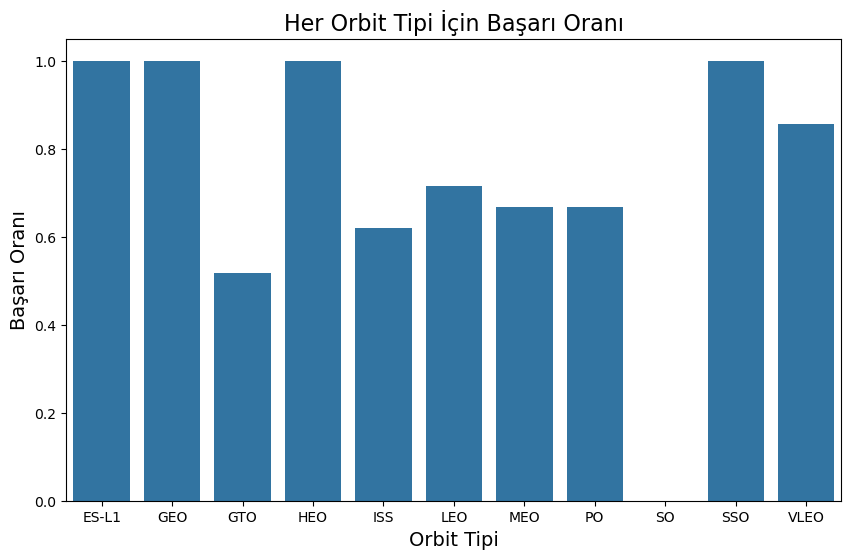

In [12]:
# Orbit türlerine göre başarı oranını hesapla (Class sütunundaki ortalama)
success_rate_by_orbit = df.groupby('Orbit')['Class'].mean().reset_index()

# Bar grafiği çiz
plt.figure(figsize=(10,6))
sns.barplot(x='Orbit', y='Class', data=success_rate_by_orbit)

# Eksen ve başlık ayarları
plt.xlabel('Orbit Tipi', fontsize=14)
plt.ylabel('Başarı Oranı', fontsize=14)
plt.title('Her Orbit Tipi İçin Başarı Oranı', fontsize=16)

plt.show()


Çizilen çubuk grafiği analiz ederek, en yüksek başarı oranına sahip yörüngeleri belirleyin.


### GÖREV 4:

**FlightNumber (Uçuş Numarası)** ile **Orbit Türü** arasındaki ilişkiyi görselleştir.

* Her yörünge tipi için, FlightNumber ile Orbit türü arasında herhangi bir ilişki olup olmadığını görmek istiyoruz.
---

**FlightNumber** x ekseninde, **Orbit** y ekseninde olacak şekilde bir dağılım (scatter) grafiği çiz ve
renkleri (hue) **class** değerine göre ayarla.



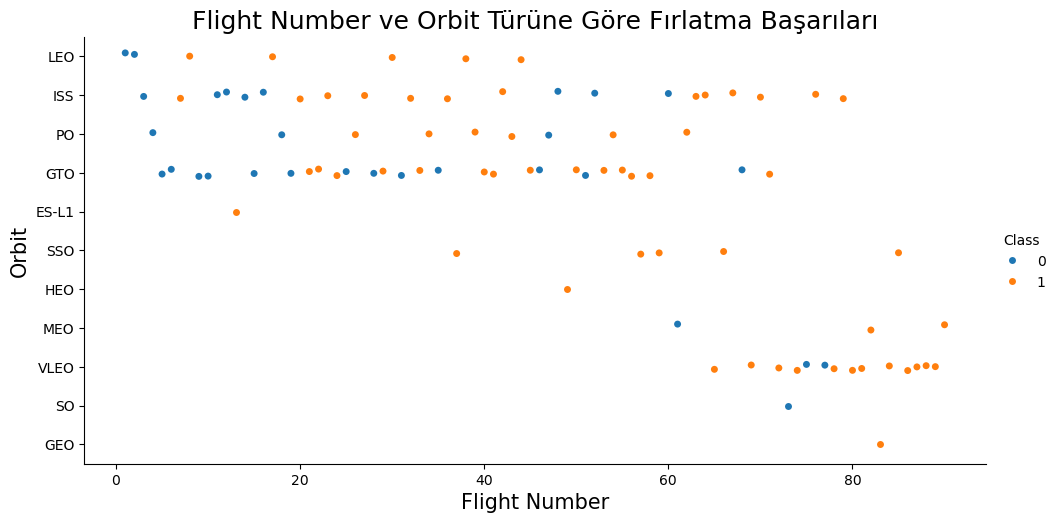

In [15]:
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=2)

plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit", fontsize=15)
plt.title("Flight Number ve Orbit Türüne Göre Fırlatma Başarıları", fontsize=18)

plt.show()



LEO (Alçak Dünya Yörüngesi) yörüngesinde, başarı uçuş sayısıyla ilişkili gibi görünüyor.
Buna karşılık, GTO (Jeosenkron Transfer Yörüngesi) yörüngesinde ise uçuş sayısı ile başarı arasında bir ilişki görünmüyor.


### GÖREV 5:

**Payload Mass (Yük Kütlesi)** ile **Orbit Türü** arasındaki ilişkiyi görselleştir.

---

Benzer şekilde, **Payload Mass** ile **Orbit** arasındaki ilişkiyi ortaya koymak için dağılım (scatter) grafikleri çizebiliriz.



---

**Payload Mass** x ekseninde, **Orbit** y ekseninde olacak şekilde bir dağılım (scatter) grafiği çiz ve
renkleri (hue) **class** değerine göre ayarla.


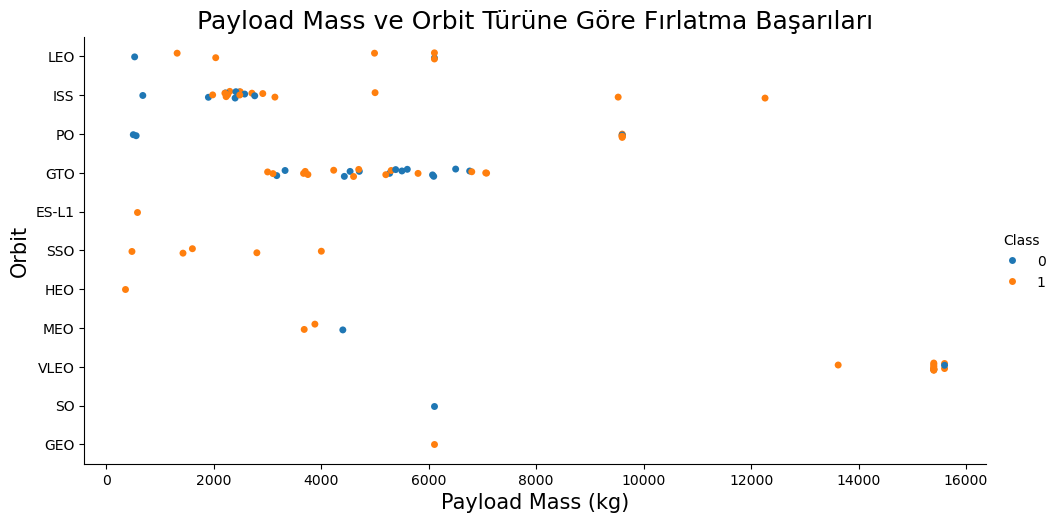

In [17]:
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, aspect=2)

plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit", fontsize=15)
plt.title("Payload Mass ve Orbit Türüne Göre Fırlatma Başarıları", fontsize=18)

plt.show()


Ağır yüklerde, başarılı inişler veya olumlu iniş oranı Polar, LEO ve ISS yörüngelerinde daha fazladır.

Ancak, GTO yörüngesi için başarılı ve başarısız inişleri ayırt etmek zor, çünkü her iki sonuç da mevcuttur.




### GÖREV 6:

Yıllık fırlatma başarı eğilimini görselleştir.

---

Ortalama fırlatma başarı eğilimini görmek için, x eksenine **Yıl (Year)**, y eksenine ise **ortalama başarı oranı (average success rate)** olacak şekilde bir çizgi grafik (line chart) çizebilirsin.

---

Verilen fonksiyon, tarih bilgisinden yılı çıkarmana yardımcı olacak:


In [21]:
# Tarih sütunundan yıl bilgisini çıkaran fonksiyon
year = []

def Extract_year():
    # df veri çerçevesindeki her 'Date' değerini al
    for i in df["Date"]:
        # Tarih stringini '-' işaretinden böl ve ilk kısmı (yıl) al
        year.append(i.split("-")[0])
    return year

# Fonksiyonu çağır ve year listesine yılları doldur
Extract_year()

# Orijinal 'Date' sütununu yıl bilgisi ile güncelle
df['Date'] = year

# Güncellenen veri çerçevesinin ilk 5 satırını göster
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0



**X ekseni çıkarılan yıl (year), Y ekseni başarı oranı (success rate) olacak şekilde bir çizgi grafik (line chart) çiz.**


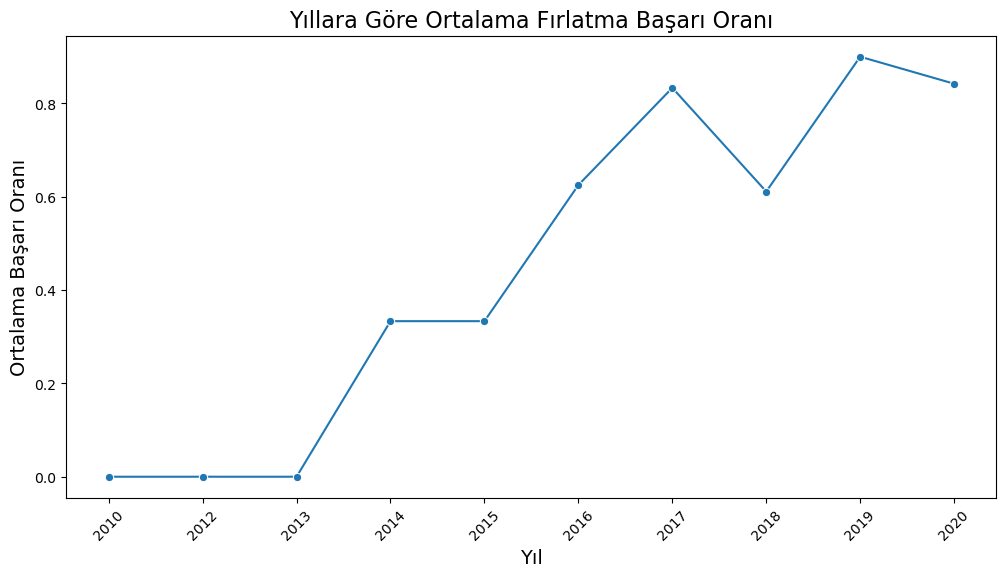

In [22]:
# Yıla göre başarı oranının ortalamasını hesapla
success_rate_per_year = df.groupby('Date')['Class'].mean().reset_index()

# Çizgi grafiği oluştur
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Class', data=success_rate_per_year, marker='o')

plt.xlabel('Yıl', fontsize=14)
plt.ylabel('Ortalama Başarı Oranı', fontsize=14)
plt.title('Yıllara Göre Ortalama Fırlatma Başarı Oranı', fontsize=16)
plt.xticks(rotation=45)

plt.show()



2013 yılından itibaren başarı oranının 2020 yılına kadar sürekli arttığını gözlemleyebilirsiniz.


### Özellik Mühendisliği (Feature Engineering)

Şu ana kadar, her önemli değişkenin başarı oranını nasıl etkilediğine dair bazı ön bilgiler edinmiş olmalısınız.
Gelecek modülde başarı tahmininde kullanılacak özellikleri (features) seçmeye başlayacağız.


In [23]:
# Tahmin modelinde kullanılacak özellikleri (features) seçiyoruz.
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights',
               'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# Seçilen özelliklerin ilk 5 kaydını görüntüle
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004



### GÖREV 7: Kategorik sütunlar için dummy değişkenler (sahte değişkenler) oluşturun

`get_dummies` fonksiyonunu kullanarak `features` veri çerçevesinde bulunan `Orbit`, `LaunchSite`, `LandingPad` ve `Serial` sütunlarına OneHotEncoder uygulayın.
    
Sonucu `features_one_hot` değişkenine atayın ve `head` yöntemiyle görüntüleyin.
    
Sonuç veri çerçevesi, kodlanmış (encoded) sütunlar dahil tüm özellikleri içermelidir.



---

**İpucu:** Kategorik sütunlar üzerinde `get_dummies()` fonksiyonunu kullanın.


In [24]:
# Kategorik sütunlar için one-hot encoding (dummy değişkenler) oluştur
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Sonucun ilk 5 satırını göster
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False



### GÖREV 8: Tüm sayısal sütunları float64 türüne dönüştürün

Artık `features_one_hot` veri çerçevesi sadece sayısal veriler içerdiğine göre, tüm veri çerçevesini `float64` veri tipine dönüştürün.



**İpucu:** `astype` fonksiyonunu kullanın.


In [25]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Artık bunu bir CSV dosyasına aktarabiliriz, ancak cevapların tutarlı olması için bir sonraki laboratuvarda verileri önceden seçilmiş bir tarih aralığında sağlayacağız.


In [26]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)